Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidMentalHealthRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(206, 9)
(206, 9)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,mentalhealth,"Not to brag, but instead of laying in bed ALL ...",NaN,"Honestly, I've found having a shower the most ...",2971,51,2019-04-15 19:13:30,bdk3xt
1,1,mentalhealth,It’s been 2 months to the day since I last sel...,NaN,That's amazing!! Good job Im so happy for you ...,2020,159,2019-10-20 07:12:42,dkgcw0
2,2,mentalhealth,I made a suicide scale. Hoping it could help o...,[suicide scale](https://emmengard.com/2019/05/...,"Living in states 8-9 for twelve years, I thoug...",1963,128,2019-05-07 22:40:26,blxcj7
3,3,mentalhealth,To the person who deleted their post few minut...,I don't really know what's going on with you a...,"Upvoted this to make sure they see it, perhaps...",1356,11,2019-08-24 18:11:22,cuwwed
4,4,mentalhealth,People who welcome you back with open arms aft...,Self isolation is horrific and that is all,"I have a friend I cancel on a lot, and he stil...",1026,25,2019-10-16 04:01:30,dijt4y


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/206 [00:00<?, ?it/s]

In [4]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,1.000,0.000,0.0000,mentalhealth,"Not to brag, but instead of laying in bed ALL ...",NaN,"Honestly, I've found having a shower the most ...",2971,51,2019-04-15 19:13:30,bdk3xt
1,1,0.138,0.667,0.196,0.0772,mentalhealth,It’s been 2 months to the day since I last sel...,NaN,That's amazing!! Good job Im so happy for you ...,2020,159,2019-10-20 07:12:42,dkgcw0
2,2,0.300,0.333,0.367,0.0000,mentalhealth,I made a suicide scale. Hoping it could help o...,[suicide scale](https://emmengard.com/2019/05/...,"Living in states 8-9 for twelve years, I thoug...",1963,128,2019-05-07 22:40:26,blxcj7
3,3,0.000,1.000,0.000,0.0000,mentalhealth,To the person who deleted their post few minut...,I don't really know what's going on with you a...,"Upvoted this to make sure they see it, perhaps...",1356,11,2019-08-24 18:11:22,cuwwed
4,4,0.211,0.567,0.223,0.0772,mentalhealth,People who welcome you back with open arms aft...,Self isolation is horrific and that is all,"I have a friend I cancel on a lot, and he stil...",1026,25,2019-10-16 04:01:30,dijt4y


In [5]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,1.000,0.000,0.0000,mentalhealth,"Not to brag, but instead of laying in bed ALL ...",NaN,"Honestly, I've found having a shower the most ...",2971,51,2019-04-15 19:13:30,bdk3xt
1,1,0.000,1.000,0.000,0.0000,mentalhealth,It’s been 2 months to the day since I last sel...,NaN,That's amazing!! Good job Im so happy for you ...,2020,159,2019-10-20 07:12:42,dkgcw0
2,2,0.135,0.683,0.182,0.7460,mentalhealth,I made a suicide scale. Hoping it could help o...,[suicide scale](https://emmengard.com/2019/05/...,"Living in states 8-9 for twelve years, I thoug...",1963,128,2019-05-07 22:40:26,blxcj7
3,3,0.082,0.765,0.153,0.9103,mentalhealth,To the person who deleted their post few minut...,I don't really know what's going on with you a...,"Upvoted this to make sure they see it, perhaps...",1356,11,2019-08-24 18:11:22,cuwwed
4,4,0.542,0.458,0.000,-0.7964,mentalhealth,People who welcome you back with open arms aft...,Self isolation is horrific and that is all,"I have a friend I cancel on a lot, and he stil...",1026,25,2019-10-16 04:01:30,dijt4y


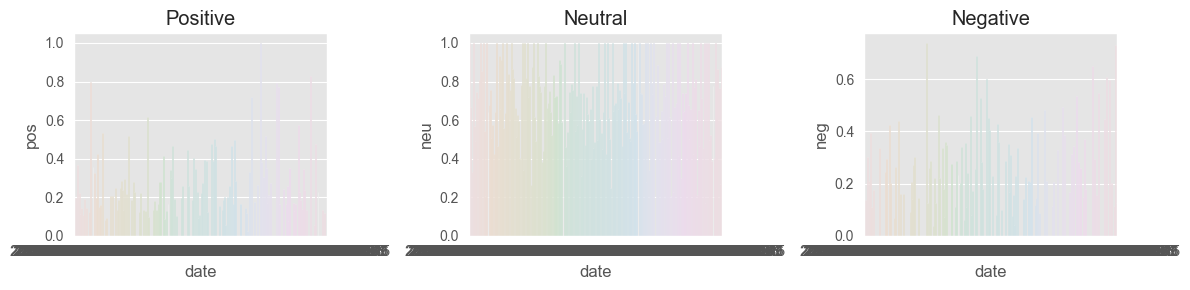

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

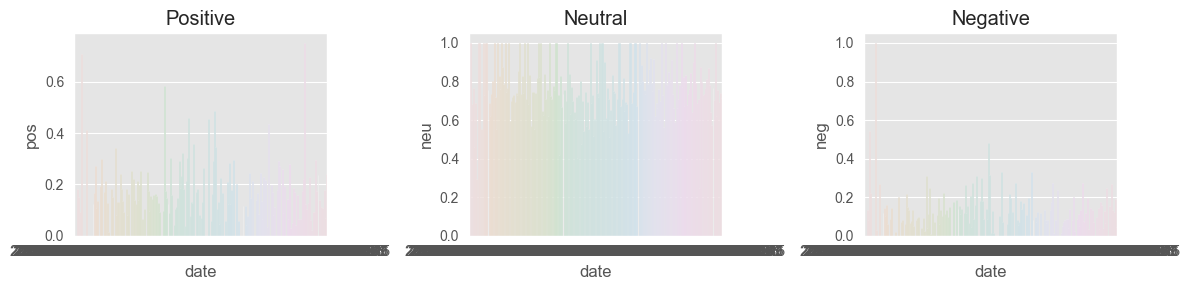

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [8]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [11]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/206 [00:00<?, ?it/s]

Broke for Content id 39
Broke for Content id 60
Broke for Content id 76
Broke for Content id 99
Broke for Content id 123
Broke for Content id 133
Broke for Content id 152
Broke for Content id 153
Broke for Content id 163
Broke for Content id 185


In [12]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

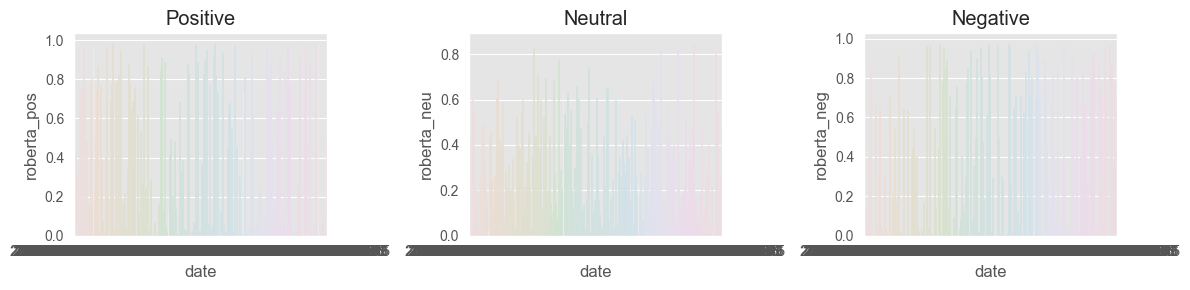

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [14]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

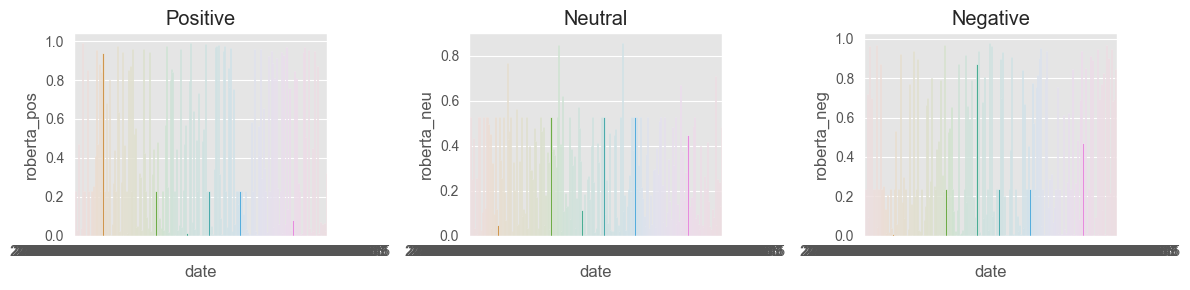

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [16]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

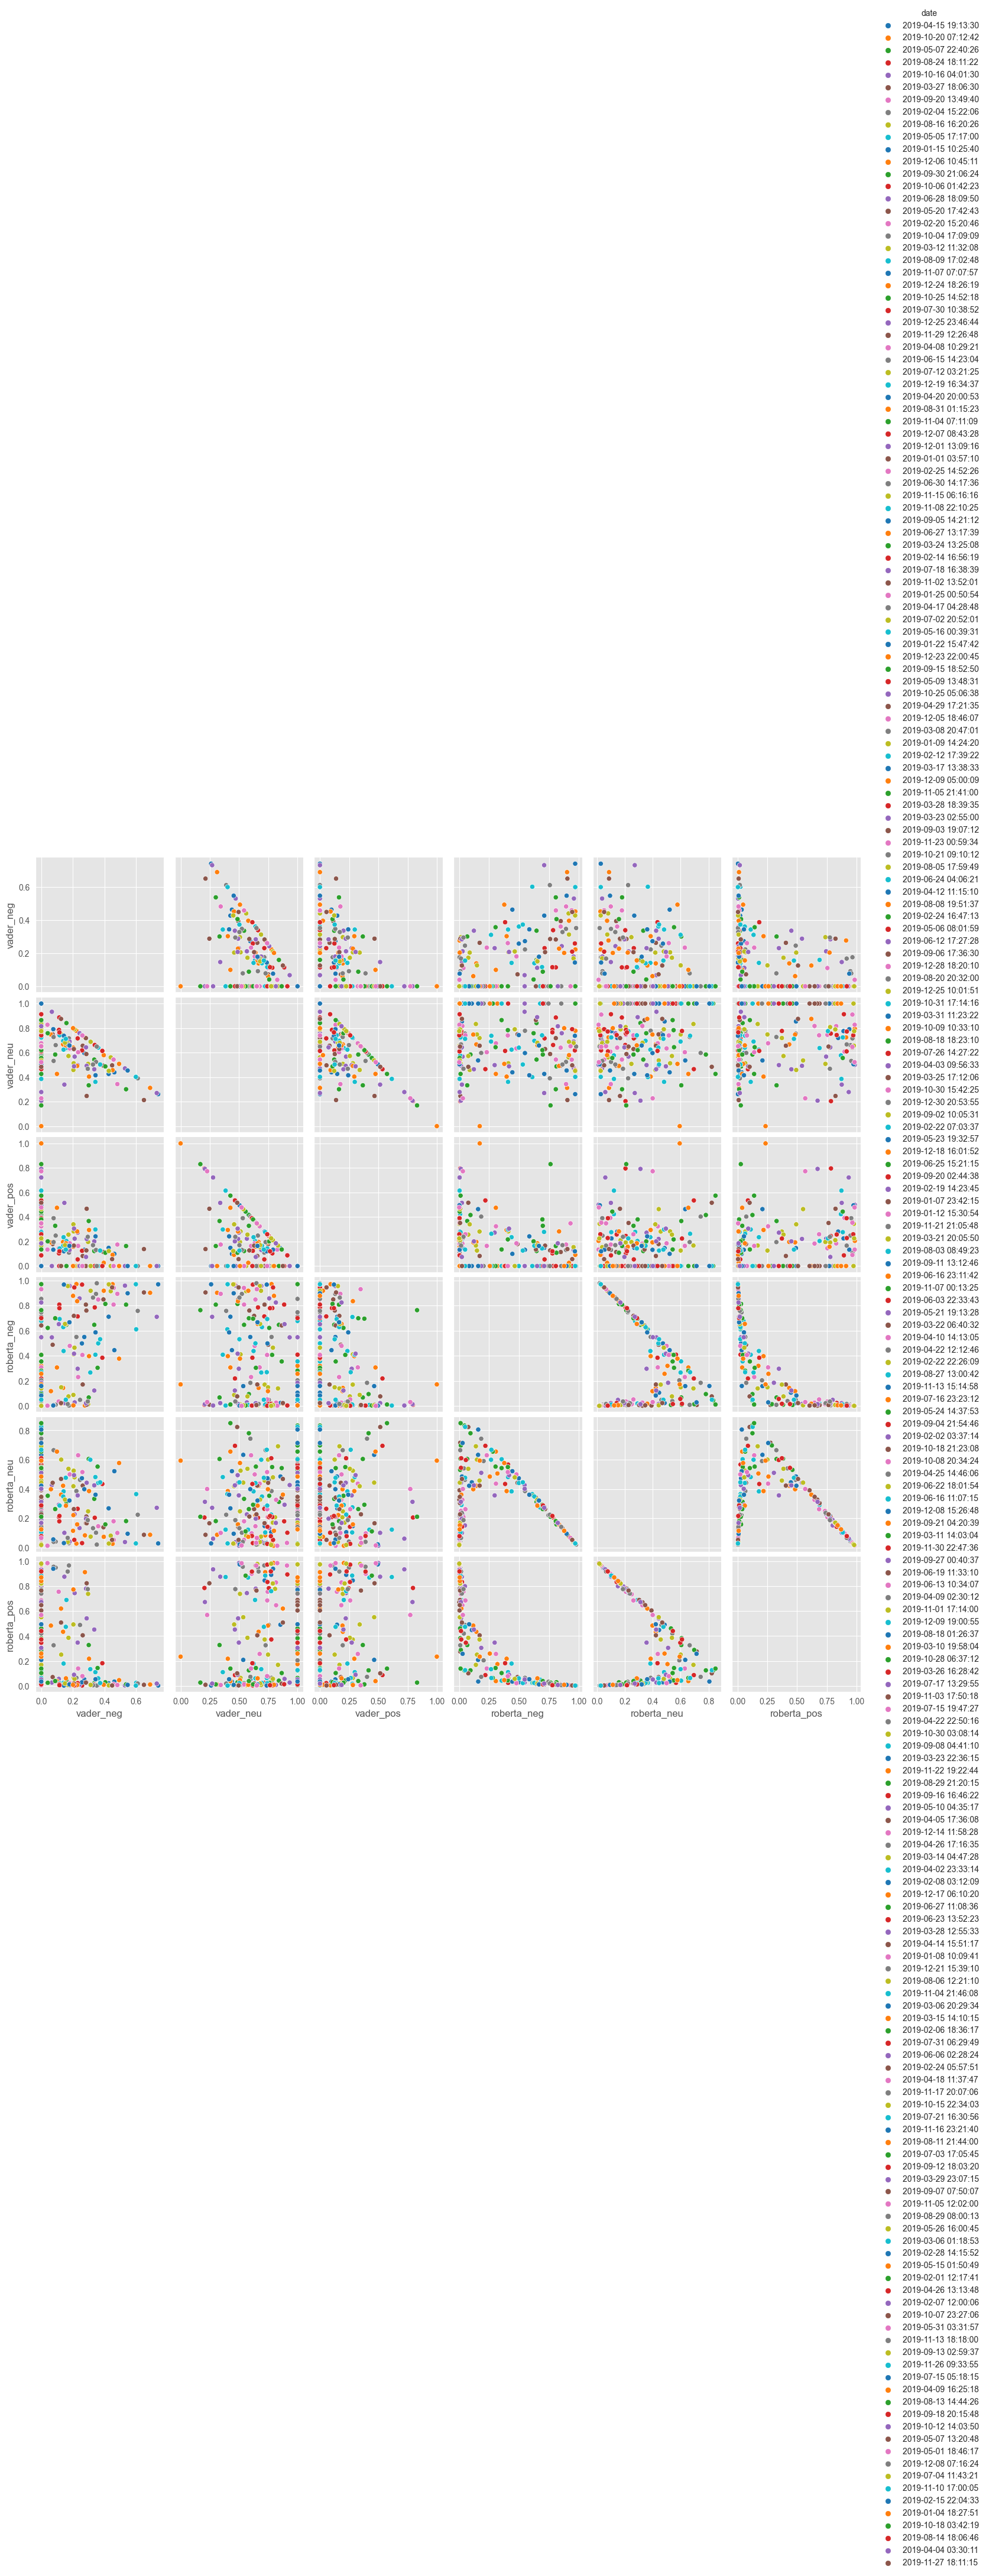

In [17]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [ ]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

In [ ]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()